In [1]:
import os
import winsound
import numpy as np
import pandas as pd
import datetime as dt
from tqdm import tqdm
tqdm.pandas()
from multiprocessing import  Pool
import time

import math, collections
from scipy.stats import linregress

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = {}
data['number_of_ticks'] = 10

year = 2019

source_file_path = f'data/tick_{year}.csv'
path, file_name = os.path.split(source_file_path)

target_file_name = 'tab_'+file_name
target_file_path = os.path.join(path, target_file_name)

chunk_file_name = 'chunk_'+file_name
chunk_file_path = os.path.join(path, chunk_file_name)

print(f'source_file_path : {source_file_path}')
print(f'chunk_file_path : {chunk_file_path}')
print(f'target_file_path : {target_file_path}')

source_file_path : data/tick_2019.csv
chunk_file_path : data\chunk_tick_2019.csv
target_file_path : data\tab_tick_2019.csv


In [3]:
%%time
df = pd.read_csv(source_file_path, nrows=1000)
#df = pd.read_csv(source_file_path)
print(f'num of records : {len(df)}')
df.head()

num of records : 1000
Wall time: 108 ms


,DateTime,Bid,Ask,Volume
0,20190101 22:02:37.254,1.14598,1.14682,4
1,20190101 22:02:38.590,1.14599,1.14682,2
2,20190101 22:02:39.138,1.14599,1.14684,4
3,20190101 22:02:55.787,1.14598,1.14684,4
4,20190101 22:03:02.060,1.14598,1.14684,4


In [4]:
df['tick'] = (df['Bid'] + df['Ask'])/2
df['spread'] = df['Ask'] - df['Bid']
df = df[['tick', 'spread']]

In [5]:
def roll_ma(ma_list):
    sema_val = list(pd.DataFrame(ma_list).ewm(span=len(ma_list)).mean()[0])[len(ma_list) - 1]    
    return(sema_val)

In [6]:
df['sema'] = df['tick'].rolling(window=data['number_of_ticks']).progress_apply(roll_ma)

991it [00:00, 1053.98it/s]


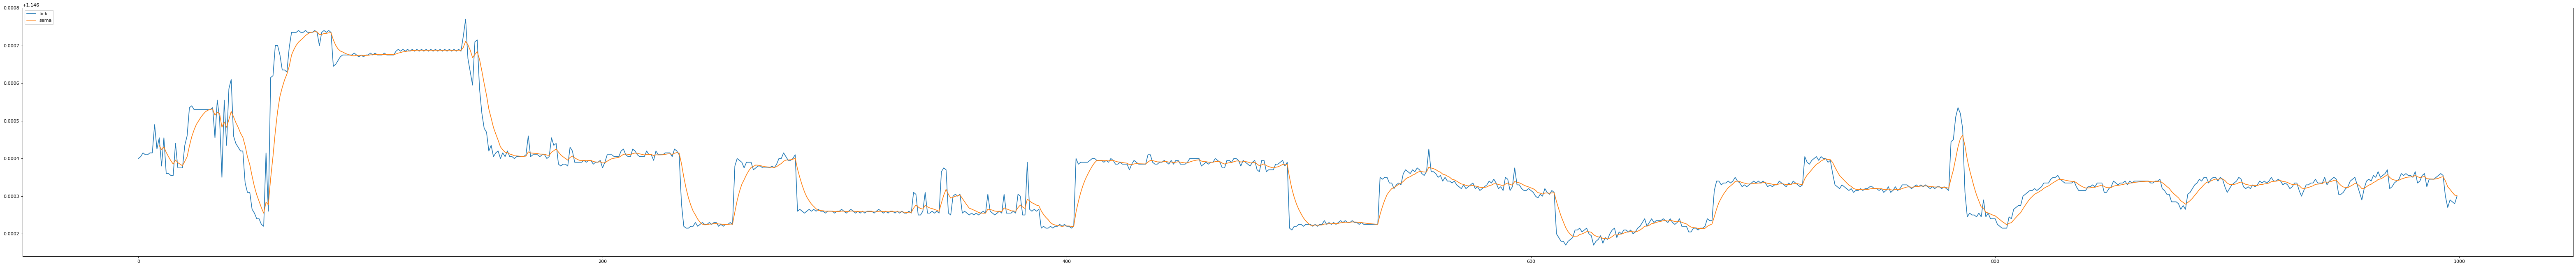

In [7]:
figure(num=None, figsize=(100, 10), dpi=80, facecolor='w', edgecolor='k')
#df_live[df_live.index.isin(list(df.index))]['tick_avg'].plot()

df['tick'].plot(label = 'tick')
df['sema'].plot(label = 'sema')
plt.legend(loc="upper left")

In [8]:
df.head(20)

,tick,spread,sema
0,1.146400,0.00084,NaN
1,1.146405,0.00083,NaN
2,1.146415,0.00085,NaN
3,1.146410,0.00086,NaN
4,1.146410,0.00086,NaN
5,1.146415,0.00085,NaN
6,1.146415,0.00085,NaN
7,1.146490,0.00084,NaN
8,1.146425,0.00071,NaN
9,1.146455,0.00077,1.146434
